In [27]:
### Breast Cancer Detection Project

# **1. Import Libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# **2. Load Dataset**
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
data.shape
# data.info()

# Assign column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data.columns = columns
# data.head()

# Drop the ID column as it's not useful for prediction
data.drop(columns=['ID'], inplace=True)


# Map Diagnosis to binary values (M = Malignant, B = Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# data.head()

# Display dataset information
data_info = data.info()
data_head = data.head()
data_description = data.describe()
# **3. Exploratory Data Analysis (EDA)**
# Check for class imbalance
class_counts = data['Diagnosis'].value_counts()
class_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19  569 non-null    f

Diagnosis
0    357
1    212
Name: count, dtype: int64

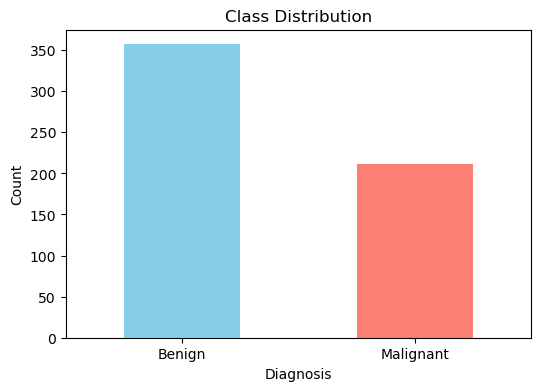

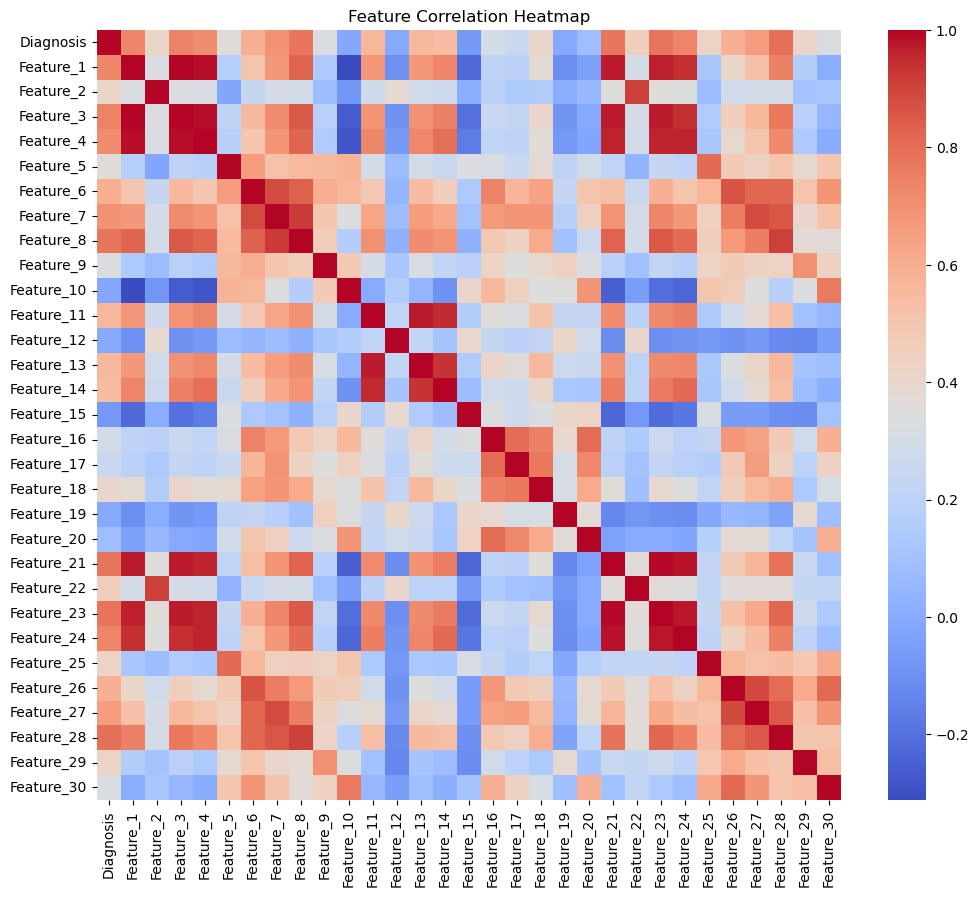

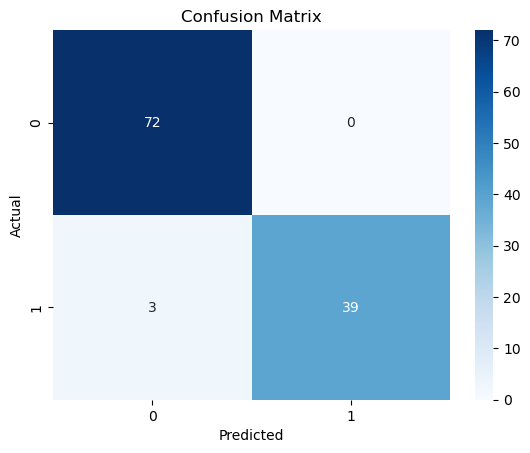

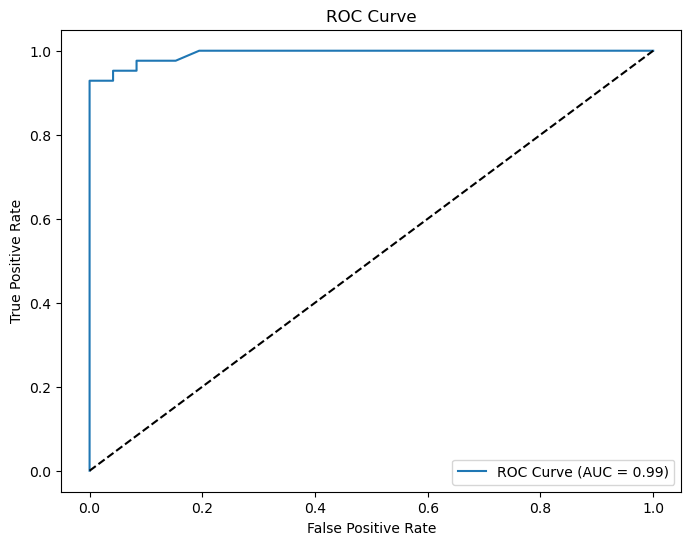

In [28]:

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks([0, 1], labels=['Benign', 'Malignant'], rotation=0)
plt.show()

# Plot a heatmap of feature correlations
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# **4. Data Preprocessing**
# Split features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **5. Model Training**
# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# **6. Model Evaluation**
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate ROC-AUC and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **7. Conclusion**
# Document insights and future improvements.


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test are the actual labels and y_pred are the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 0.93
F1-Score: 0.96


Precision: 1.00
Recall: 0.93
F1-Score: 0.96

Adjusted Precision: 0.97
Adjusted Recall: 0.93
Adjusted F1-Score: 0.95


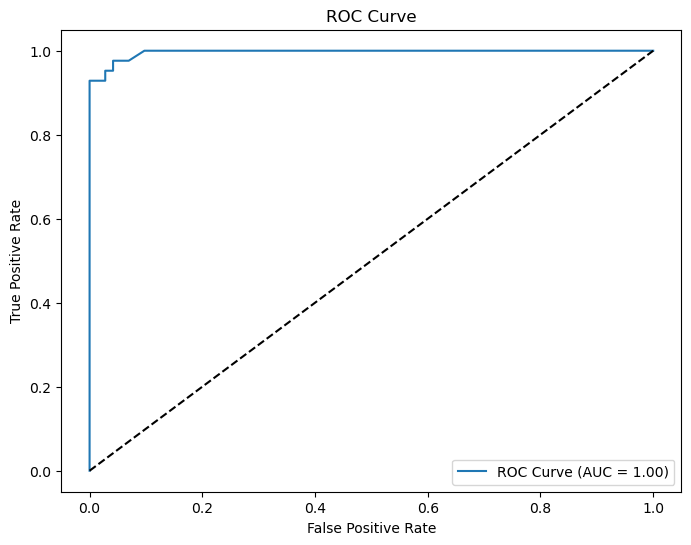

In [2]:
# **1. Import Libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

# **2. Load Dataset**
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Assign column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data.columns = columns

# Drop the ID column as it's not useful for prediction
data.drop(columns=['ID'], inplace=True)

# Map Diagnosis to binary values (M = Malignant, B = Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# **3. Data Preprocessing**
# Split features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. SMOTE (Handling Class Imbalance)**
# Apply SMOTE to the training data to balance class distribution
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# **5. Model Training with Class Weight and SMOTE**
# Initialize the Random Forest model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the SMOTE balanced dataset
model.fit(X_train_smote, y_train_smote)

# **6. Model Prediction and Evaluation**
# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the model using traditional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# **7. Adjusting the Classification Threshold to Increase Recall**
# Get predicted probabilities for the positive class (malignant)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Lower the threshold to 0.4 to increase recall
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Calculate new precision, recall, and F1-score after threshold adjustment
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)

# Print the adjusted evaluation results
print(f"\nAdjusted Precision: {precision_adjusted:.2f}")
print(f"Adjusted Recall: {recall_adjusted:.2f}")
print(f"Adjusted F1-Score: {f1_adjusted:.2f}")

# **8. ROC Curve and AUC**
# Calculate ROC-AUC and plot the ROC curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# **9. Conclusion**
# Document insights and future improvements


Logistic Regression - Precision: 0.98, Recall: 0.95, F1-Score: 0.96
SVM - Precision: 0.97, Recall: 0.93, F1-Score: 0.95
KNN - Precision: 0.91, Recall: 0.95, F1-Score: 0.93
Random Forest - Precision: 1.00, Recall: 0.93, F1-Score: 0.96
Gradient Boosting - Precision: 0.97, Recall: 0.90, F1-Score: 0.94
XGBoost - Precision: 0.98, Recall: 0.98, F1-Score: 0.98


C:\Users\dpradhan\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dpradhan\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Neural Network - Precision: 1.00, Recall: 0.95, F1-Score: 0.98
Naive Bayes - Precision: 0.91, Recall: 0.93, F1-Score: 0.92
AdaBoost - Precision: 1.00, Recall: 0.95, F1-Score: 0.98

Best Model based on F1-Score:
Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Precision: 0.98
Recall: 0.

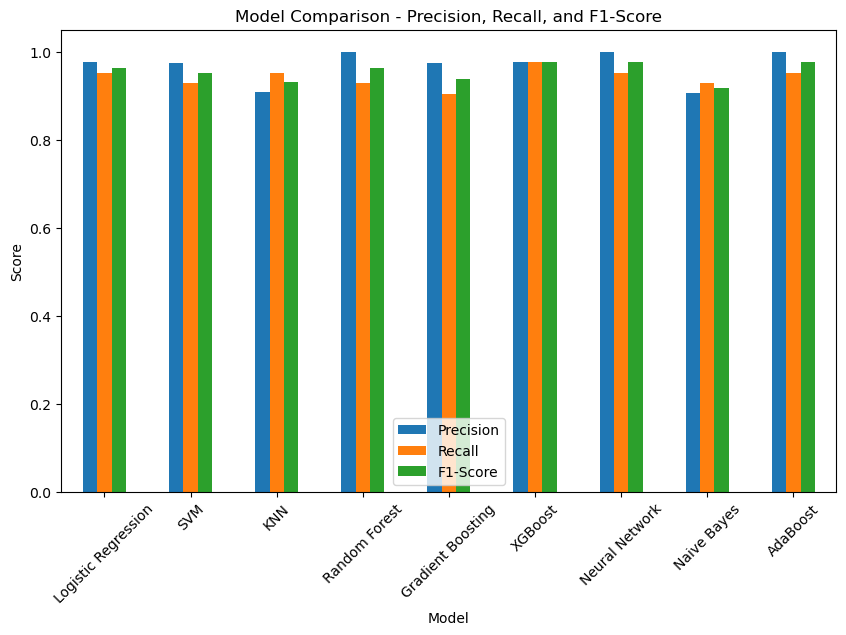

In [51]:
# **1. Import Libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
# import lightgbm as lgb
from imblearn.over_sampling import SMOTE, ADASYN

# **2. Load Dataset**
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

# Assign column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data.columns = columns

# Drop the ID column as it's not useful for prediction
data.drop(columns=['ID'], inplace=True)

# Map Diagnosis to binary values (M = Malignant, B = Benign)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# **3. Data Preprocessing**
# Split features and target
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. SMOTE (Handling Class Imbalance)**
# Apply SMOTE to the training data to balance class distribution
smote = ADASYN(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# **5. Define Models**
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(scale_pos_weight=5, random_state=42),
    # 'LightGBM': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# **6. Evaluate Models**
best_model = None
best_score = 0
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    
    # Print the results for each model
    print(f"{name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    
    # Update best model if necessary
    if f1 > best_score:
        best_score = f1
        best_model = model

# **7. Best Model Evaluation**
print("\nBest Model based on F1-Score:")
print(f"Model: {best_model}")
y_pred_best = best_model.predict(X_test)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Precision: {precision_best:.2f}")
print(f"Recall: {recall_best:.2f}")
print(f"F1-Score: {f1_best:.2f}")

# **8. Plotting Model Comparison**
# Convert results to a DataFrame for easy visualization
results_df = pd.DataFrame(results).T

# Plot the results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison - Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# **9. Conclusion**
# Document insights and future improvements


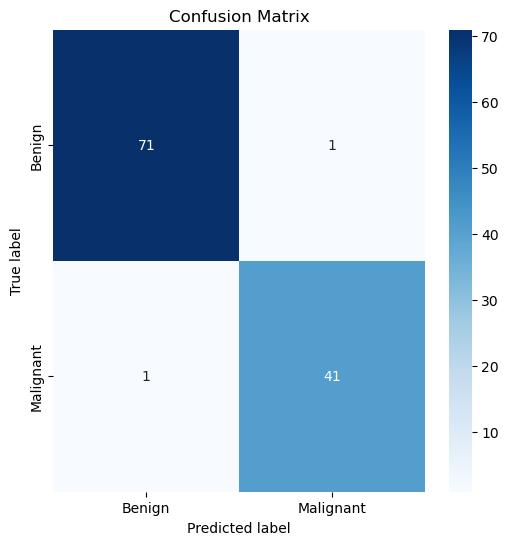

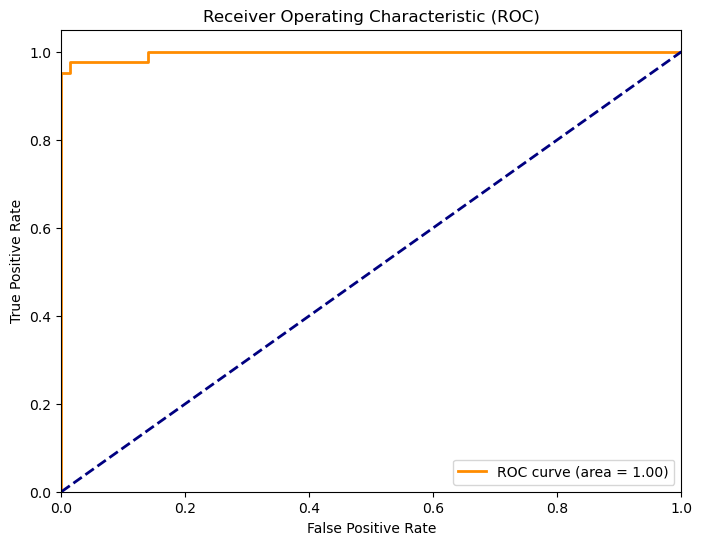

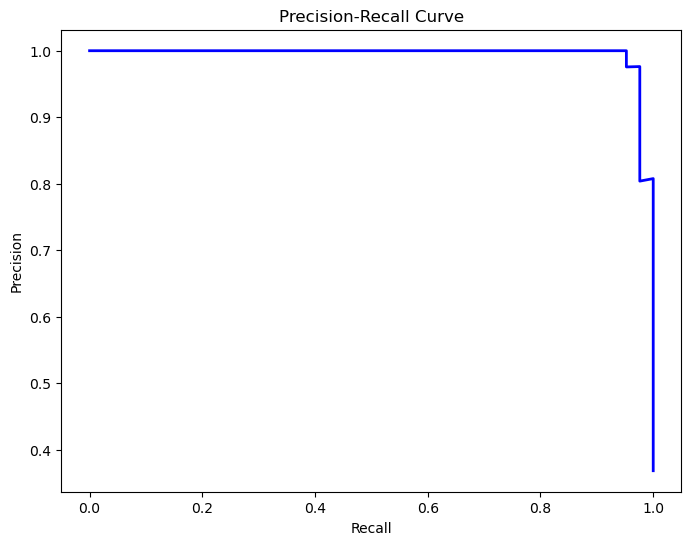

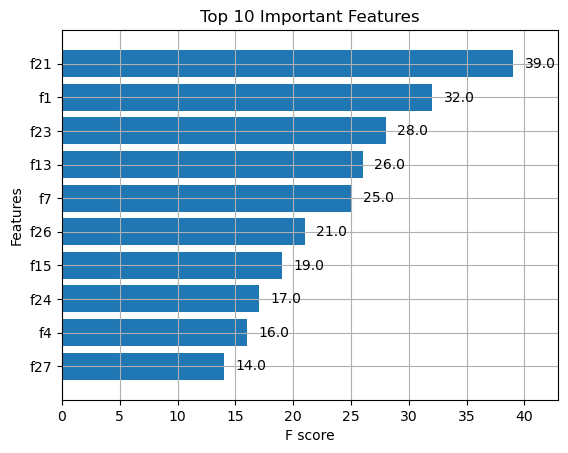

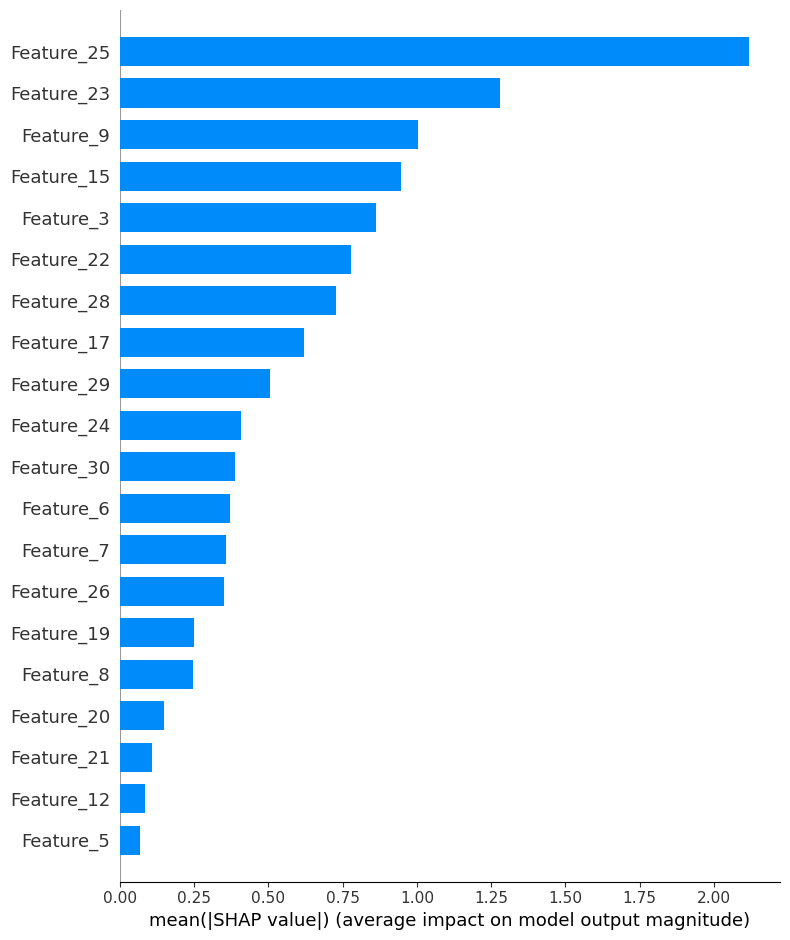

IndexError: invalid index to scalar variable.

In [55]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score
import shap


# **2. Confusion Matrix**
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# **3. ROC Curve & AUC**
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# **4. Precision-Recall Curve**
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# **5. Feature Importance**
# Plot feature importance for XGBoost
xgb.plot_importance(best_model, max_num_features=10, importance_type='weight', height=0.8)
plt.title("Top 10 Important Features")
plt.show()

# **6. SHAP for Model Interpretability**
# Create SHAP explainer object
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, feature_names=data.columns[2:], plot_type="bar")

# Plot SHAP values for an individual prediction (e.g., the first test sample)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:], feature_names=data.columns[2:])


In [56]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']

C:\Users\dpradhan\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dpradhan\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Best Model Evaluation:
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Precision: 0.98, Recall: 0.98, F1-Score: 0.98


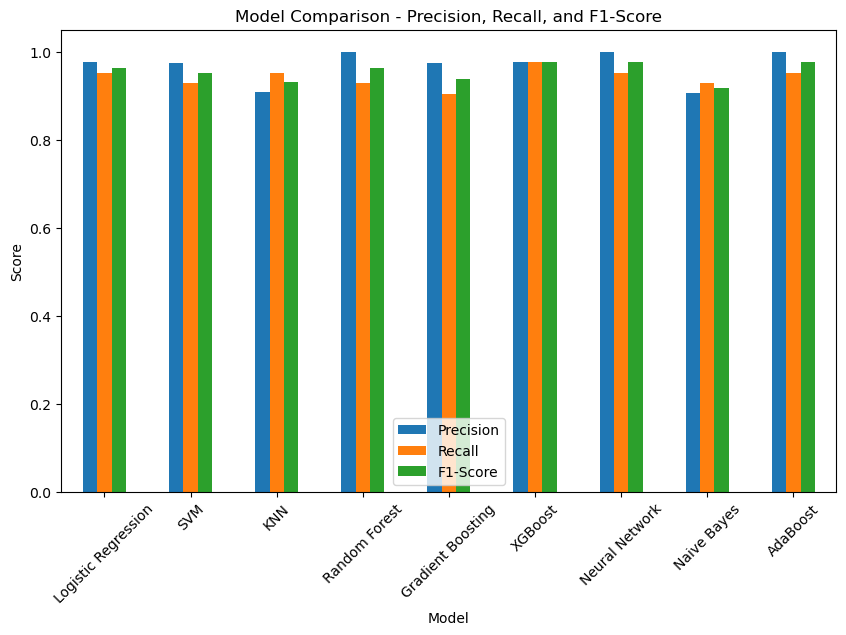

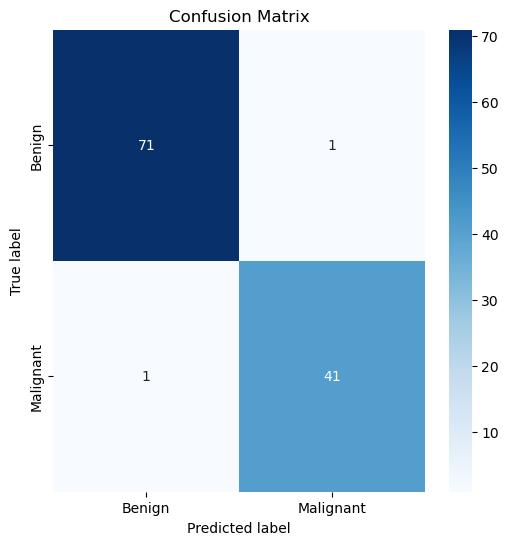

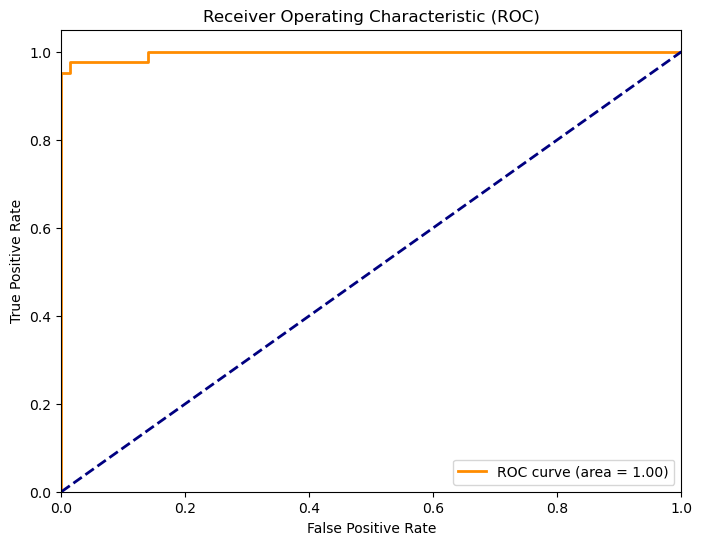

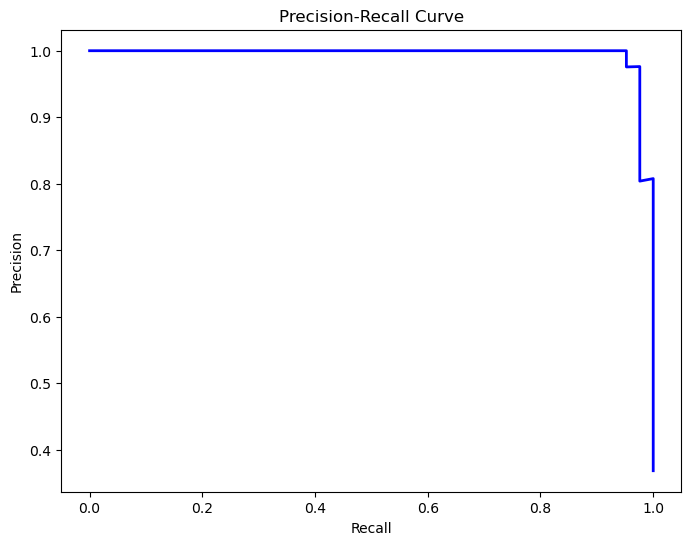

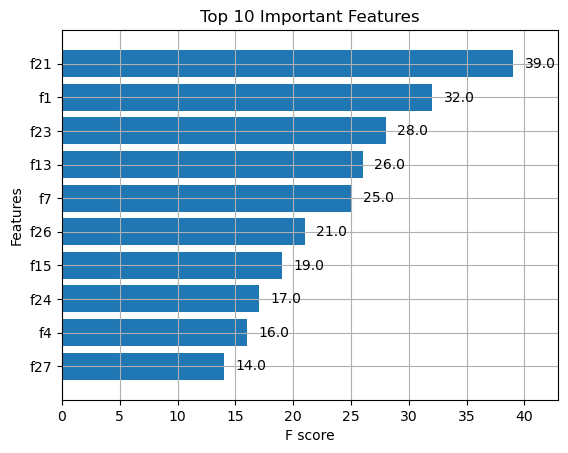

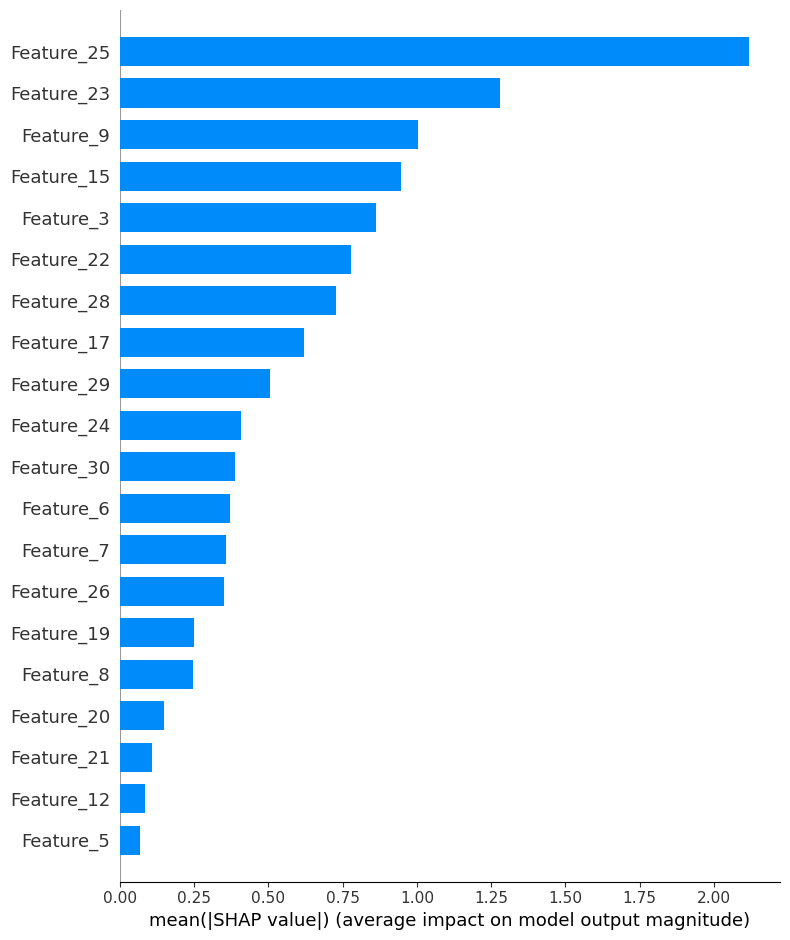

IndexError: invalid index to scalar variable.

In [60]:
# **1. Import Libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from imblearn.over_sampling import ADASYN
import shap

# **2. Load Dataset**
def load_data():
    """Load and preprocess the dataset."""
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
    columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
    data.columns = columns
    data.drop(columns=['ID'], inplace=True)
    data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})
    
    return data

# **3. Data Preprocessing**
def preprocess_data(data):
    """Preprocess the data: split into features and target, split into train/test sets, and standardize."""
    X = data.drop(columns=['Diagnosis'])
    y = data['Diagnosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    smote = ADASYN(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    return X_train_smote, X_test, y_train_smote, y_test

# **4. Define Models**
def define_models():
    """Define and return the list of models to evaluate."""
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
        'SVM': SVC(kernel='linear', class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'XGBoost': xgb.XGBClassifier(scale_pos_weight=5, random_state=42),
        'Neural Network': MLPClassifier(random_state=42),
        'Naive Bayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(random_state=42)
    }
    return models

# **5. Evaluate Models**
def evaluate_models(models, X_train_smote, y_train_smote, X_test, y_test):
    """Train, predict, and evaluate models."""
    best_model = None
    best_score = 0
    results = {}

    for name, model in models.items():
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results[name] = {'Precision': precision, 'Recall': recall, 'F1-Score': f1}
        
        if f1 > best_score:
            best_score = f1
            best_model = model

    return best_model, results

# **6. Best Model Evaluation**
def evaluate_best_model(best_model, X_test, y_test):
    """Evaluate the best model on the test set."""
    y_pred_best = best_model.predict(X_test)
    precision_best = precision_score(y_test, y_pred_best)
    recall_best = recall_score(y_test, y_pred_best)
    f1_best = f1_score(y_test, y_pred_best)

    return precision_best, recall_best, f1_best

# **7. Plotting Model Comparison**
def plot_model_comparison(results):
    """Plot the model comparison for Precision, Recall, and F1-Score."""
    results_df = pd.DataFrame(results).T
    results_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Comparison - Precision, Recall, and F1-Score')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

# **8. Confusion Matrix**
def plot_confusion_matrix(y_test, y_pred_best):
    """Plot the confusion matrix."""
    cm = confusion_matrix(y_test, y_pred_best)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.title("Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

# **9. ROC Curve & AUC**
def plot_roc_curve(y_test, best_model, X_test):
    """Plot ROC Curve and AUC score."""
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# **10. Precision-Recall Curve**
def plot_precision_recall_curve(y_test, best_model, X_test):
    """Plot Precision-Recall curve."""
    precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:,1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# **11. Feature Importance (XGBoost)**
def plot_feature_importance(best_model):
    """Plot feature importance for XGBoost."""
    xgb.plot_importance(best_model, max_num_features=10, importance_type='weight', height=0.8)
    plt.title("Top 10 Important Features")
    plt.show()

# **12. SHAP for Model Interpretability**
def plot_shap_summary_plot(best_model, X_test, data):
    """Plot SHAP summary plot for model interpretability."""
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=data.columns[2:], plot_type="bar")

def plot_shap_force_plot(best_model, X_test, data):
    """Plot SHAP force plot for a single prediction."""
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    shap.initjs()
    shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:], feature_names=data.columns[2:])

# **Main Execution**
def main():
    data = load_data()
    X_train_smote, X_test, y_train_smote, y_test = preprocess_data(data)
    models = define_models()
    best_model, results = evaluate_models(models, X_train_smote, y_train_smote, X_test, y_test)
    precision_best, recall_best, f1_best = evaluate_best_model(best_model, X_test, y_test)

    print(f"\nBest Model Evaluation:\nBest Model: {best_model}\nPrecision: {precision_best:.2f}, Recall: {recall_best:.2f}, F1-Score: {f1_best:.2f}")
    plot_model_comparison(results)
    plot_confusion_matrix(y_test, best_model.predict(X_test))
    plot_roc_curve(y_test, best_model, X_test)
    plot_precision_recall_curve(y_test, best_model, X_test)
    plot_feature_importance(best_model)
    plot_shap_summary_plot(best_model, X_test, data)
    plot_shap_force_plot(best_model, X_test, data)

if __name__ == "__main__":
    main()
